In [9]:
import pandas as pd
import numpy as np
df =  pd.read_excel('/content/drive/MyDrive/Datasets/Market analysis.xlsx')

# Task
Write and execute Python code to perform multiple linear regression on the data I provide, including data preparation, model training, evaluation, and visualization of results.

## Data preparation

### Subtask:
Handle missing values and prepare the data for the model.


**Reasoning**:
Identify and count missing values, then handle them using interpolation and forward/backward fill strategies, and finally verify that missing values are handled.



In [10]:
print("Missing values before handling:")
print(df.isnull().sum())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values in numerical columns using interpolation and ffill/bfill
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume']
for col in numerical_cols:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')
    df[col] = df[col].fillna(method='ffill')
    df[col] = df[col].fillna(method='bfill')


print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Date                0
Open               68
High               27
Low                63
Close               4
Adjusted Close     54
Volume            164
dtype: int64

Missing values after handling:
Date              0
Open              0
High              0
Low               0
Close             0
Adjusted Close    0
Volume            0
dtype: int64


/tmp/ipython-input-2812605622.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
/tmp/ipython-input-2812605622.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='bfill')


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Define features and target variables and split the data into training and testing sets.



In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
features = df.drop(['Date', 'Close'], axis=1)
target = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target:", y_train.shape)
print("Shape of testing target:", y_test.shape)

Shape of training features: (164, 5)
Shape of testing features: (42, 5)
Shape of training target: (164,)
Shape of testing target: (42,)


## Model training

### Subtask:
Train a Multiple Linear Regression model on the training data.


**Reasoning**:
Train a Multiple Linear Regression model using the training data.



In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained model on the testing data.


**Reasoning**:
Evaluate the trained model using Mean Squared Error and R-squared score on the test data.



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.029435884234170963
R-squared Score: 0.9999580698724476


## Visualize results

### Subtask:
Visualize the actual vs predicted values.


**Reasoning**:
Visualize the actual vs predicted values using a scatter plot and a diagonal line for comparison.



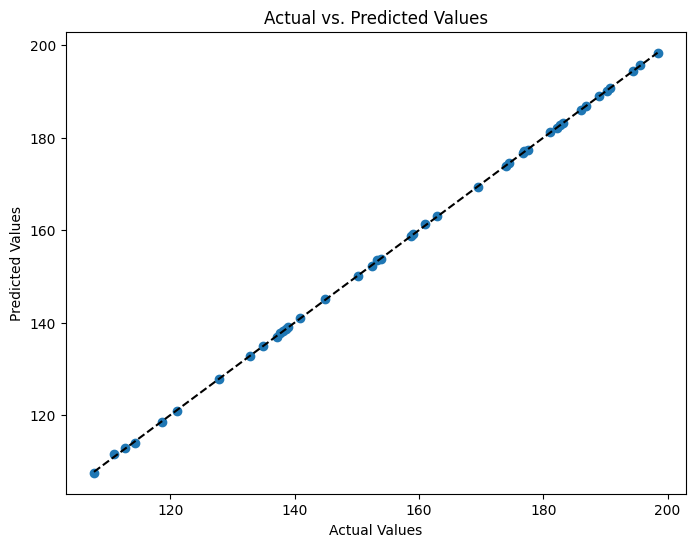

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()